In [1]:
# Function to solve the 0/1 Knapsack problem using divide and conquer approach
function knapsack_dq(W, weights, values, n)
    # Base case: no items left or no capacity left
    if n == 0 || W == 0
        return 0, []
    end

    # If the weight of the nth item is more than the knapsack capacity W,
    # then this item cannot be included in the optimal solution
    if weights[n] > W
        return knapsack_dq(W, weights, values, n - 1)
    else
        # Solve the subproblem including the nth item
        value_including_n, items_including_n = knapsack_dq(W - weights[n], weights, values, n - 1)
        value_including_n += values[n]

        # Solve the subproblem excluding the nth item
        value_excluding_n, items_excluding_n = knapsack_dq(W, weights, values, n - 1)

        # Compare the two cases and return the better result
        if value_including_n > value_excluding_n
            return value_including_n, [n; items_including_n]
        else
            return value_excluding_n, items_excluding_n
        end
    end
end

knapsack_dq (generic function with 1 method)

In [2]:
# Function to solve the 0/1 Knapsack problem using dynamic programming approach
function knapsack_dp(W, weights, values)
    n = length(weights)
    
    # Create a 2D array to store the maximum value at each n, W 
    ###(n=number of items, W=maximum weight in the knapsack)
    dp = zeros(Int, n + 1, W + 1)

    # Build the dp array bottom-up
    for i in 1:n
        for w in 0:W
            if weights[i] <= w
                dp[i + 1, w + 1] = max(dp[i, w + 1], values[i] + dp[i, w - weights[i] + 1])
            else
                dp[i + 1, w + 1] = dp[i, w + 1]
            end
        end
    end

    # The maximum value is found at dp[n+1, W+1]
    max_value = dp[n + 1, W + 1]

    # Backtrack to find the items included in the optimal solution
    selected_items = []
    w = W
    for i in n:-1:1
        if dp[i + 1, w + 1] != dp[i, w + 1]
            push!(selected_items, i)
            w -= weights[i]
        end
    end

    return max_value, reverse(selected_items)
end

knapsack_dp (generic function with 1 method)

In [3]:
# Example usage of the divide & conquer function
using Random
Random.seed!(10)
weights =rand(1:10, 40) * 10 
values = rand(1:10, 40) * 1
W = 300
n = length(weights)

@time max_value, selected_items = knapsack_dq(W, weights, values, n)
println("\nweights:", weights)
println("Values:", values)
println("\nMaximum value in Knapsack: ", max_value)
println("Selected items: ", reverse(selected_items))

  3.011252 seconds (55.61 M allocations: 2.911 GiB, 5.62% gc time, 3.16% compilation time)

weights:[40, 10, 20, 20, 50, 60, 80, 70, 70, 60, 70, 10, 10, 10, 90, 10, 90, 90, 30, 50, 30, 50, 100, 60, 10, 60, 20, 30, 40, 10, 30, 80, 60, 70, 90, 20, 80, 90, 50, 80]
Values:[2, 8, 8, 5, 8, 4, 6, 2, 2, 1, 1, 6, 10, 1, 7, 4, 9, 4, 1, 7, 8, 9, 3, 3, 2, 6, 1, 1, 6, 10, 9, 1, 6, 1, 7, 6, 1, 9, 1, 4]

Maximum value in Knapsack: 94
Selected items: Any[2, 3, 4, 5, 12, 13, 14, 16, 21, 22, 25, 30, 31, 36]


In [4]:
# Example usage of the dynamic programming function
using Random
Random.seed!(10)
weights =rand(1:10, 40) * 10
values = rand(1:10, 40) * 1
W = 300

@time max_value, selected_items = knapsack_dp(W, weights, values)
println("\nweights:", weights)
println("Values:", values)
println("\nMaximum value in Knapsack: ", max_value)
println("Selected items: ", selected_items)

  0.056617 seconds (22.09 k allocations: 1.619 MiB, 99.80% compilation time)

weights:[40, 10, 20, 20, 50, 60, 80, 70, 70, 60, 70, 10, 10, 10, 90, 10, 90, 90, 30, 50, 30, 50, 100, 60, 10, 60, 20, 30, 40, 10, 30, 80, 60, 70, 90, 20, 80, 90, 50, 80]
Values:[2, 8, 8, 5, 8, 4, 6, 2, 2, 1, 1, 6, 10, 1, 7, 4, 9, 4, 1, 7, 8, 9, 3, 3, 2, 6, 1, 1, 6, 10, 9, 1, 6, 1, 7, 6, 1, 9, 1, 4]

Maximum value in Knapsack: 94
Selected items: Any[2, 3, 4, 5, 12, 13, 14, 16, 21, 22, 25, 30, 31, 36]


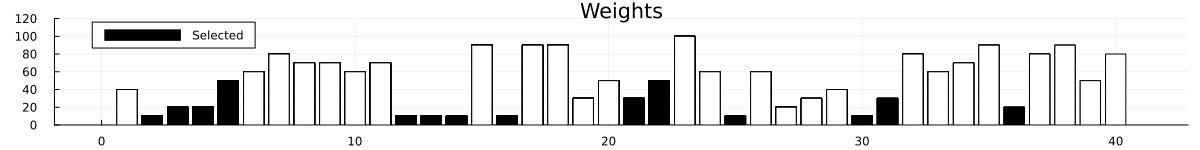

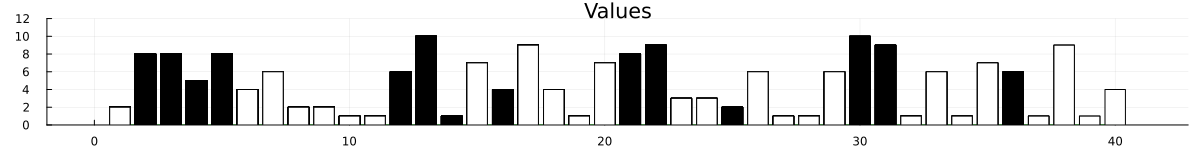

In [5]:
### visuially showing the results  
using Plots

# Function to determine the color
get_color(index) = index in selected_items ? :black : :white

# Initialize the plots with empty data
p_weights = plot(1:length(weights), fill(0, length(weights)), label="",
                 title="Weights", xlabel="Items", ylabel="Weight",
                 legend=:topleft, ylim=(0, maximum(weights)*1.2), color=:green, size=(1200,150))

p_values = plot(1:length(values), fill(0, length(values)), label="",
                title="Values", xlabel="Items", ylabel="Value", 
                legend=false, ylim=(0, maximum(values)*1.2), color=:green, size=(1200,150))


for i in 1:length(weights)
    # Update weights plot
    bar!(p_weights, 1:i, weights[1:i], label="",
         color=[get_color(j) for j in 1:i])
    
    # Update values plot
    bar!(p_values, 1:i, values[1:i], label="",
         color=[get_color(j) for j in 1:i])
    
end

plot!(p_weights, legend=true)

# Add a dummy plot for the legend
plot!(p_weights, [NaN], [NaN], label="Selected", color=:black, seriestype=:shape)
#plot!(p_weights, [NaN], [NaN], label="Not Selected", color=:white, seriestype=:shape)



display(p_weights)
display(p_values)
